In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import missingno as msno

### Bring in the data

In [4]:
train_location = "/Users/erikgregorywebb/Documents/Python/data/House-Prices-Advanced-Regression/train.csv"
test_location = "/Users/erikgregorywebb/Documents/Python/data/House-Prices-Advanced-Regression/test.csv"

train = pd.read_csv(train_location)
test = pd.read_csv(test_location)
target = train.SalePrice.values

In [18]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Clean in the data

#### Data Types

#### Missing Values

In [88]:
missing_values = pd.DataFrame(train.isnull().sum())
missing_values = missing_values[(missing_values >0).any(axis=1)]
missing_values = missing_values.sort_values(by = 0, ascending = False)
missing_values.columns = ['Number of Missing Values']
missing_values

,Number of Missing Values
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81
GarageQual,81


In [ ]:
# https://github.com/ResidentMario/missingno

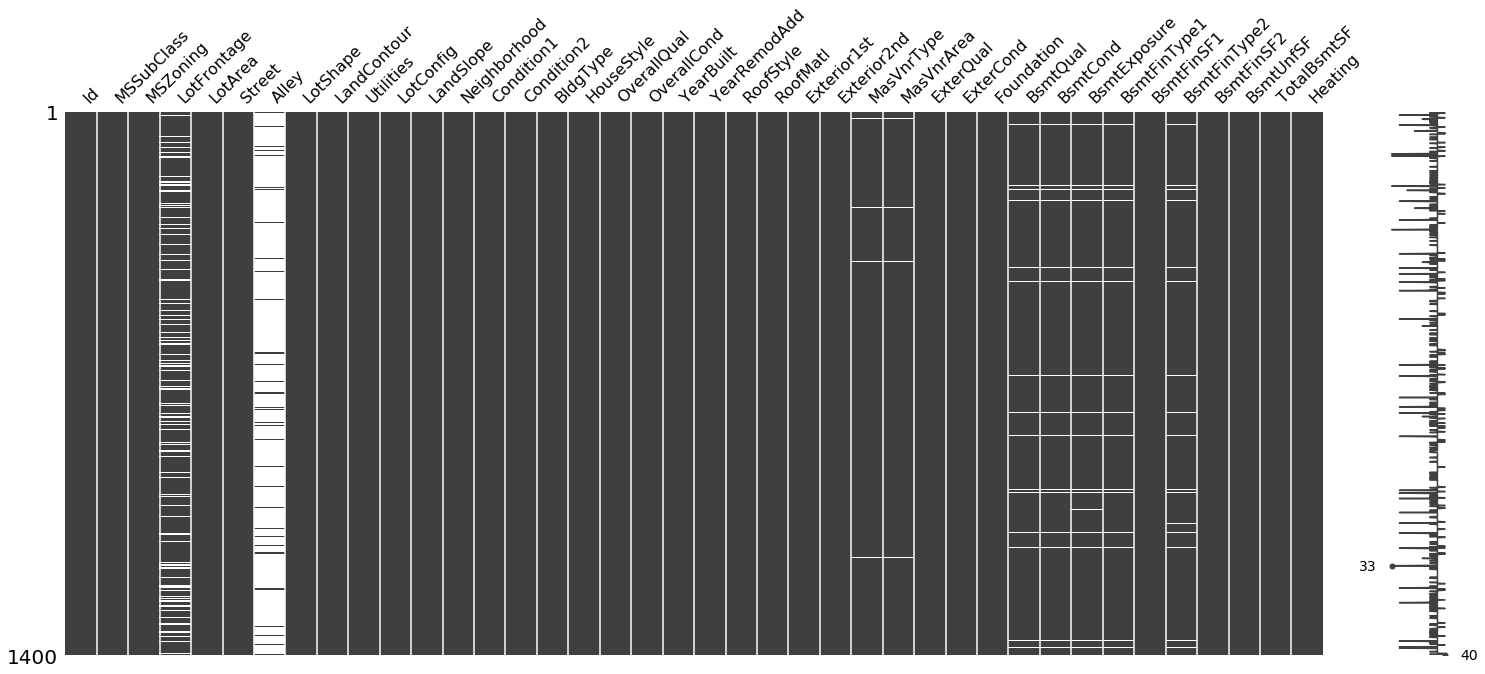

In [81]:
msno.matrix(train.iloc[:,0:40].sample(1400))

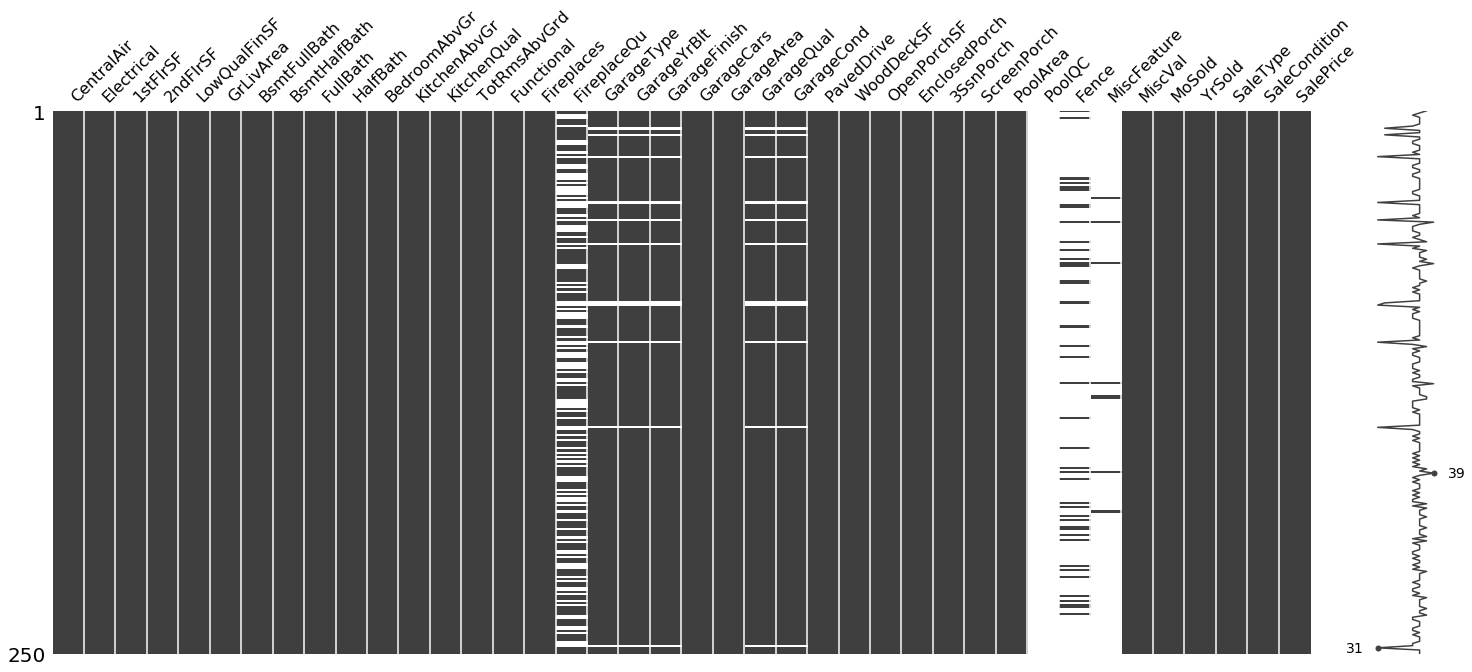

In [77]:
msno.matrix(train.iloc[:,41:81].sample(250))

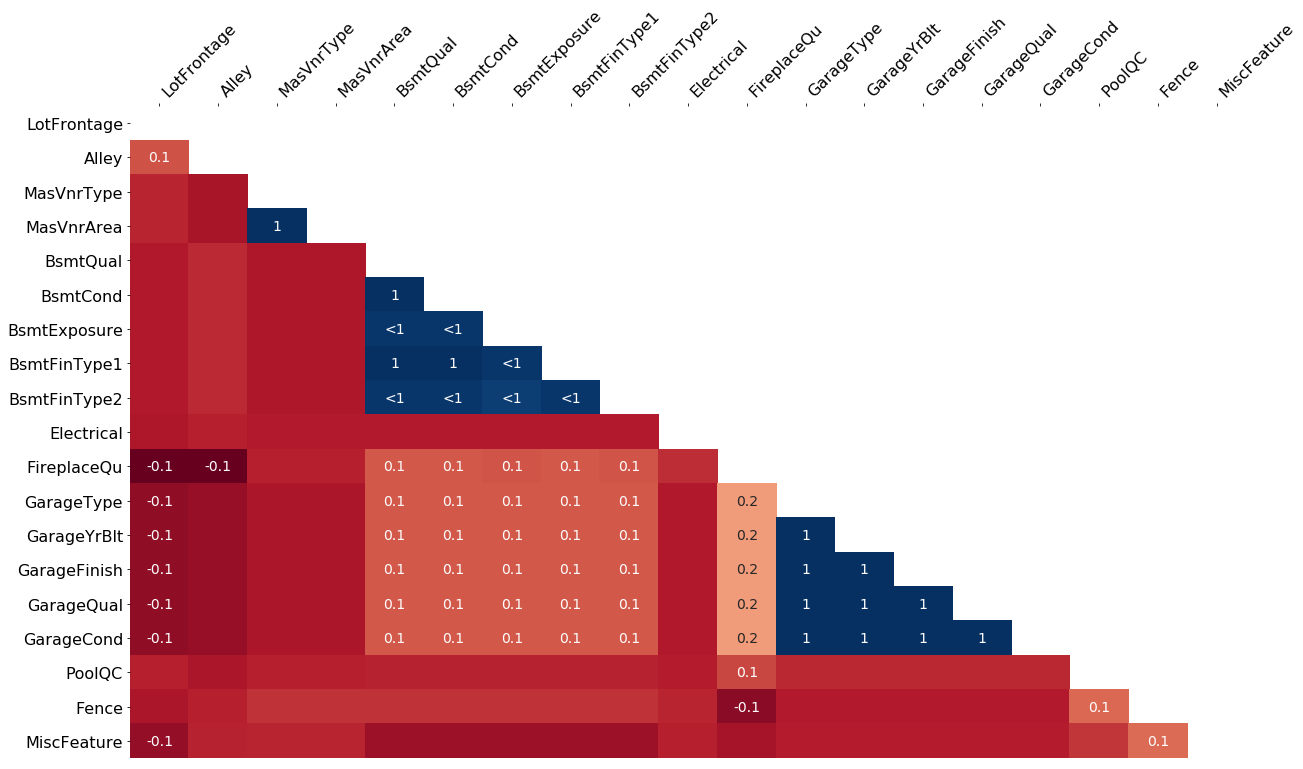

In [86]:
msno.heatmap(train)

In [119]:
missing = train[pd.isnull(train['LotFrontage'])].SalePrice.values
sample_df = train.sample(n = len(missing))
not_missing = sample_df[pd.notnull(sample_df['LotFrontage'])].SalePrice.values

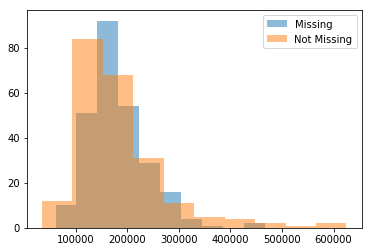

In [120]:
plt.hist(missing, alpha=0.5, label='Missing')
plt.hist(not_missing, alpha=0.5, label='Not Missing')
plt.legend(loc='upper right')

In [161]:
def compare_distributions(feature):
    missing = train[pd.isnull(train[feature])].SalePrice.values
    if len(missing) < 100:
            not_missing = train.SalePrice.values
    else:
        sample_df = train.sample(n = len(missing))
        not_missing = sample_df[pd.notnull(sample_df[feature])].SalePrice.values
    
    plt.hist(missing, alpha=0.6, color = np.random.rand(3) ,label='Missing')
    plt.hist(not_missing, alpha=0.6, label='Not Missing')
    plt.title(feature)
    plt.legend(loc='upper right')
    plt.pause(0.001)

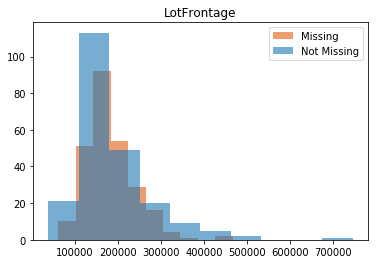

In [159]:
compare_distributions('LotFrontage')

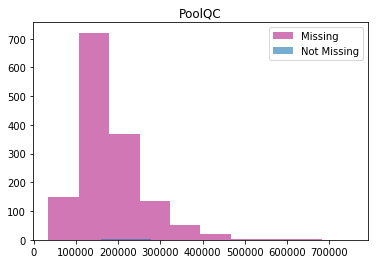

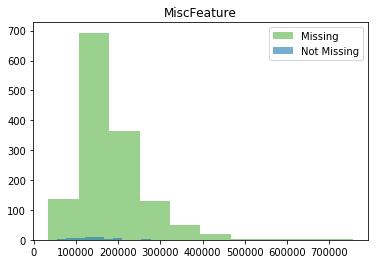

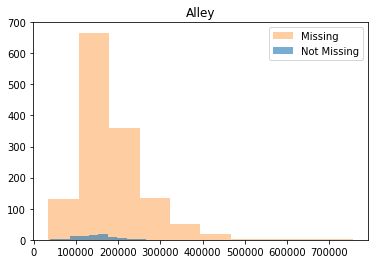

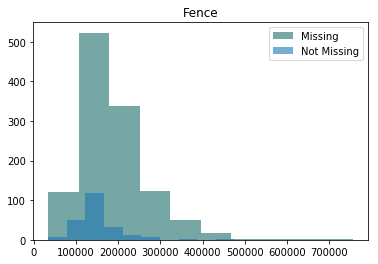

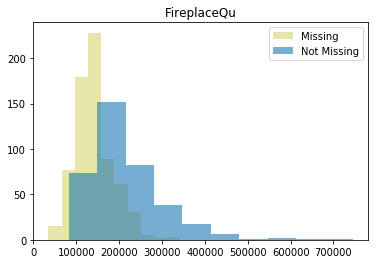

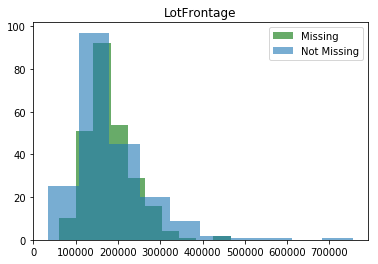

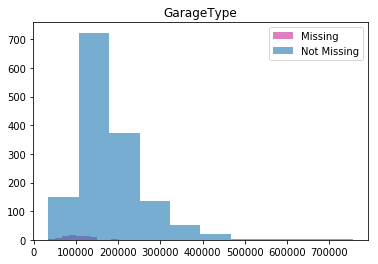

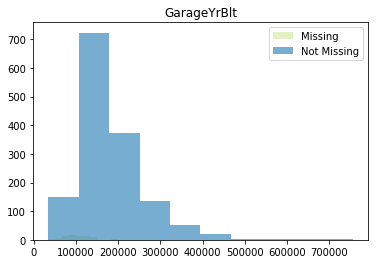

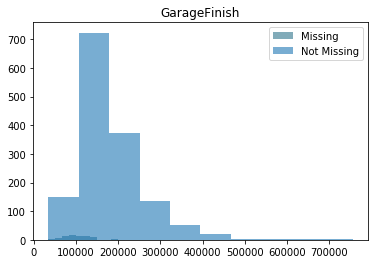

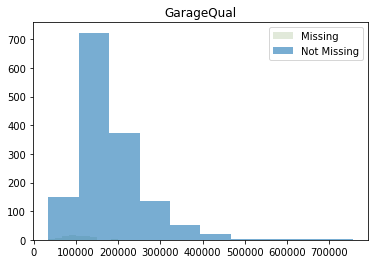

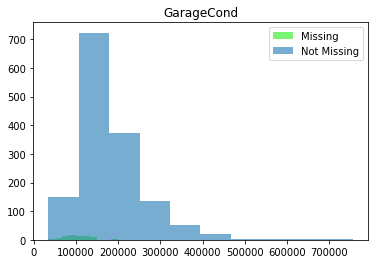

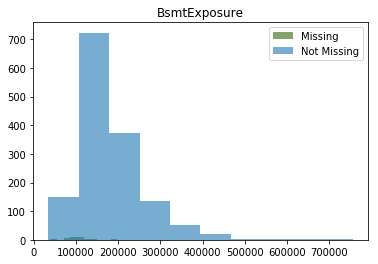

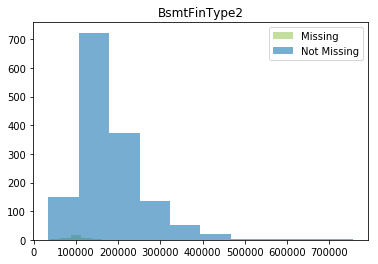

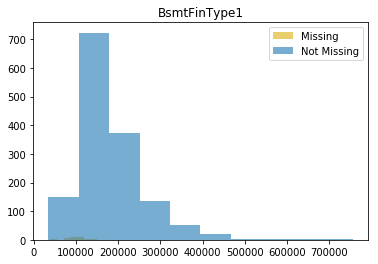

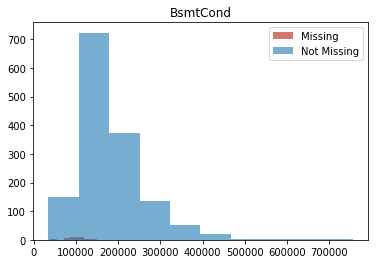

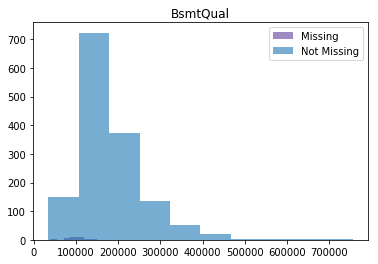

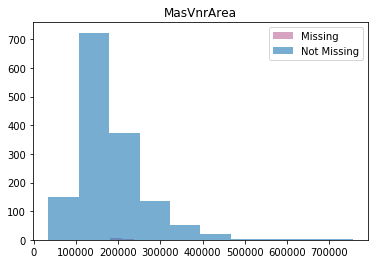

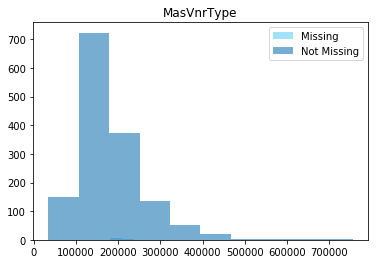

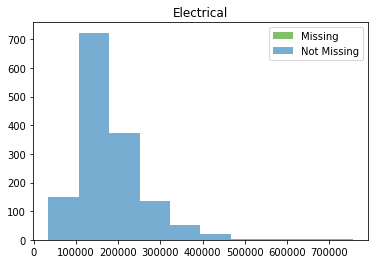

In [162]:
features = missing_values.index
for feature in features:
    compare_distributions(feature)

### Explore in the data

In [16]:
features = list(train.columns.values)
for feature in features:
    print(feature, "\n", train[feature].unique(), "\n")

Id 
 [   1    2    3 ..., 1458 1459 1460] 

MSSubClass 
 [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40] 

MSZoning 
 ['RL' 'RM' 'C (all)' 'FV' 'RH'] 

LotFrontage 
 [  65.   80.   68.   60.   84.   85.   75.   nan   51.   50.   70.   91.
   72.   66.  101.   57.   44.  110.   98.   47.  108.  112.   74.  115.
   61.   48.   33.   52.  100.   24.   89.   63.   76.   81.   95.   69.
   21.   32.   78.  121.  122.   40.  105.   73.   77.   64.   94.   34.
   90.   55.   88.   82.   71.  120.  107.   92.  134.   62.   86.  141.
   97.   54.   41.   79.  174.   99.   67.   83.   43.  103.   93.   30.
  129.  140.   35.   37.  118.   87.  116.  150.  111.   49.   96.   59.
   36.   56.  102.   58.   38.  109.  130.   53.  137.   45.  106.  104.
   42.   39.  144.  114.  128.  149.  313.  168.  182.  138.  160.  152.
  124.  153.   46.] 

LotArea 
 [ 8450  9600 11250 ..., 17217 13175  9717] 

Street 
 ['Pave' 'Grvl'] 

Alley 
 [nan 'Grvl' 'Pave'] 

LotShape 
 ['Reg' 'IR1' 'IR2'

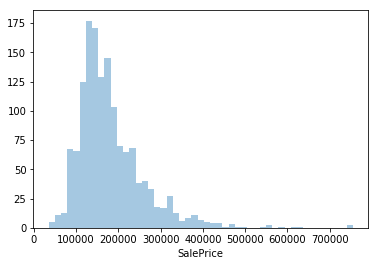

In [48]:
sns.distplot(train.SalePrice, kde=False)

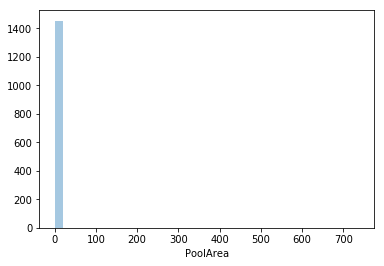

In [62]:
sns.distplot(train.PoolArea, kde=False)

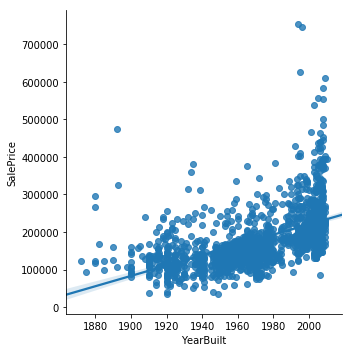

In [42]:
sns.lmplot(x = "YearBuilt", y = "SalePrice", data = train)

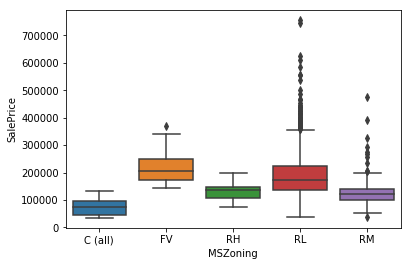

In [41]:
order = sorted(train.MSZoning.unique())
sns.boxplot(x="MSZoning", y="SalePrice", order = order, data=train)

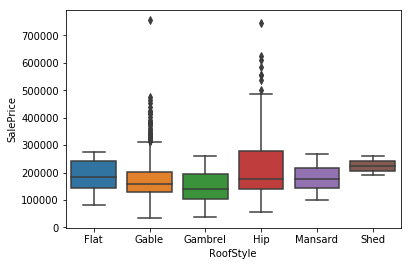

In [43]:
order = sorted(train.RoofStyle.unique())
sns.boxplot(x="RoofStyle", y="SalePrice", order = order, data=train)

In [163]:
#pd.get_dummies(train)